In [1]:
# Se for necessário, estabelecer as versões corretas das bibliotecas para vizualização correta do sinal
#!pip3 install librosa==0.4.2
#!pip3 install numba==0.45

class sound:
    
    def __init__(self, arquive):
        self.arquive = arquive
        self.name = arquive[arquive.rfind('/')+1:].replace('.wav', '')
        from scipy.io import wavfile
        import numpy as np
        sprate, samples = wavfile.read(arquive)
        self.sprate = sprate
        self.samples = samples
        self.length = len(samples)/sprate
        self.time = np.linspace(0., self.length, len(samples))
        self.signal = list(zip(self.time, samples))
        self.fft = np.fft.fft(samples)
        self.fftfreq = np.fft.fftfreq(len(samples), d=1/sprate)
        return
        
    def play(self):
        from playsound import playsound
        playsound(self.arquive)
        return
        
    def plot(self, size=(20,6), title=None, xzoom=None, yzoom=None):
        import librosa
        import matplotlib.pyplot as plt
        import librosa.display
        import numpy as np 
        plt.figure(figsize=size)
        if title != None:
            plt.title(title)
        plt.xlabel('Tempo')
        plt.ylabel('Amplitude')
        if xzoom != None:
            plt.xlim(0, xzoom)
        if yzoom != None:
            plt.xlim(0, yzoom)
        x = np.array(self.samples)
        #librosa.display.waveshow(x, sr=44100, alpha=0.8)
        librosa.display.waveplot(x, sr=self.sprate, color='orange', alpha=0.8)
        plt.show()
        return 

    def plotfft_pure(self, size=(20,6)):
        import matplotlib.pyplot as plt
        import numpy as np
        plt.figure(1,figsize=size)
        plt.title("FFT")
        plt.xlabel("Frequency(Hz)")
        plt.ylabel("Real")
        plt.plot(self.fftfreq, np.array(self.fft).real, color='darkcyan')
        plt.show()
        return 
    
    def plotfft(self, size=(20,6), xzoom=3000, yzoom=None, lw=1.8):
        import matplotlib.pyplot as plt
        msp = []
        for i in self.fft:
            msp.append(abs(i))
        mfreq = [] 
        for i in self.fftfreq:
            mfreq.append(abs(i))
        plt.figure(1,figsize=size)
        #plt.title("Espectro")
        plt.xlabel("Frequência (Hz)")
        plt.xlim(0, xzoom)
        if yzoom != None:
            plt.ylim(0, yzoom)
        plt.ylabel("Módulo")
        plt.plot(mfreq, msp, color='darkcyan', lw=lw)
        plt.show()
        return 

    
    
    
    
    
class signal:
    
    def __init__(self):
        self.samples = None
        self.time = None
        self.length = None
        self.signal = None
        self.sprate = 44100
        self.fundamental = None
        
    def oscilation(self, f, T):
        import numpy as np
        t = np.linspace(0, T, int(T*self.sprate), endpoint=False)
        x = np.sin(2*np.pi*f*t)
        self.fundamental = f
        self.samples = x
        self.time = t
        self.length = T
        return self
    
    def add(self, f, P):
        import numpy as np
        x = np.sin(2*np.pi*f*self.time)*P
        self.fundamental = f
        self.samples = self.samples + x
        return self
    
    def play(self):
        import numpy as np
        from scipy.io import wavfile
        from playsound import playsound
        X = self.samples*(1/max(self.samples)) #normalizar
        wavfile.write('playing.wav', self.sprate, np.float32(X))
        playsound('playing.wav')
        return
    
    def plot(self, size=(20,6), title=None, xzoom=None, yzoom=None):
        import librosa
        import matplotlib.pyplot as plt
        import librosa.display
        import numpy as np 
        plt.figure(figsize=size)
        if title != None:
            plt.title(title)
        plt.xlabel('Tempo')
        plt.ylabel('Amplitude')
        if xzoom != None:
            plt.xlim(0, xzoom)
        if yzoom != None:
            plt.xlim(0, yzoom)
        x = np.array(self.samples)
        #librosa.display.waveshow(x, sr=self.sprate, alpha=0.8)
        librosa.display.waveplot(x, sr=self.sprate, color='orange', alpha=0.8)
        plt.show()
        return
    
    def plotfft(self, size=(20,6), xzoom=3000, yzoom=None, lw=1.8):
        import matplotlib.pyplot as plt
        import numpy as np
        self.fft = np.fft.fft(self.samples)
        self.fftfreq = np.fft.fftfreq(len(self.samples), d=1/self.sprate)
        msp = []
        for i in self.fft:
            msp.append(abs(i))
        mfreq = [] 
        for i in self.fftfreq:
            mfreq.append(abs(i))
        plt.figure(1,figsize=size)
        #plt.title("Espectro")
        plt.xlabel("Frequência (Hz)")
        plt.xlim(0, xzoom)
        if yzoom != None:
            plt.ylim(-(yzoom/50), yzoom)
        plt.ylabel("Módulo")
        plt.plot(mfreq, msp, color='darkcyan', lw=lw)
        plt.show()
        return 
        
    def exp_decay(self, alpha):
        import numpy as np
        dt = 1/self.sprate
        t = np.arange(0, self.length, dt)
        self.samples = self.samples*np.exp(alpha*(self.length - t))*120
        return self
    
    def envelopment(self, env):
        import numpy as np
        L = min([len(self.samples), len(env.samples)])
        t=self.time[:L] ; sp=self.samples[:L] ; env=env.samples[:L]
        newsp = np.array(sp)*np.array(env)
        self.samples = newsp
        return self
    
    def create(self, nome):
        import numpy as np
        from scipy.io import wavfile
        #Normalizar antes de criar o arquivo
        X = self.samples*(1/max(self.samples))
        wavfile.write(nome+'.wav', self.sprate, np.float32(X))
        return nome+'.wav'
    
    
    
    
    
    

class envelope:

    def __init__(self):
        self.samples = None
        self.length = None
        self.sprate = 44100
        return
        
    def get_hilbert(self, sig):
        from scipy.signal import hilbert
        import numpy as np
        
        s = hilbert(sig.samples)
        self.samples = np.abs(s)
        self.lenght = len(s)
        return self
    
    def plot(self, size=(26,6), color="brown"):
        import matplotlib.pyplot as plt
        if type(self.samples) == type(None):
            print("Empty envelope!")
        else:
            plt.figure(figsize=size)
            plt.plot(self.samples, color=color)
            plt.xticks([])  
            plt.yticks([])
            plt.show()
        return
    
    def exp_decay(self, alpha, length):
        import numpy as np
        dt = 1/self.sprate
        t = np.arange(0, length, dt)
        self.samples = np.exp(alpha*(length - t))*120
        return self
    
    def geometric(self, lar, length):
        import numpy as np
        dt = 1/self.sprate
        intv = []
        coefs = []
        for i in range(1,len(lar)):
            intv.append((lar[i-1][0],lar[i][0]))
            if (lar[i][0] - lar[i-1][0]) == 0:
                coefs.append(1)
            else:
                coefs.append((lar[i][1] - lar[i-1][1])/(lar[i][0] - lar[i-1][0]))
        intv.append((lar[i][0],length))
        if (length - lar[i][0]) == 0:
            coefs.append(1)
        else:
            coefs.append((1 - lar[i-1][1])/(length - lar[i][0]))
        env = []
        for i, c, l in zip(intv, coefs, lar):
            env = env + list(l[1] + c*np.arange(0, i[1]-i[0],dt))
        self.samples = env[:int(self.sprate*length)]
        self.length = length
        return self
    
    def lowpass(self, wd, N=2):
        from scipy import signal
        b, a = signal.butter(N, wd, btype='lowpass')
        self.samples = signal.filtfilt(b, a, self.samples)
        return self
    
    def highpass(self, wd, N=2):
        from scipy import signal
        b, a = signal.butter(N, wd, btype='highpass')
        self.samples = signal.filtfilt(b, a, self.samples)
        return self
    
    
    
    
    
    
class spectrum:
    
    def __init__(self):
        self.samples = None
        self.freqs = None
        self.sprate = None
        self.fundamental = None
        self.compare = None
        self.principals = None
        return
        
    def get(self, sound, accuracy):
        import numpy as np
        self.samples = np.fft.fft(sound.samples)
        self.freqs = np.fft.fftfreq(len(sound.samples), d=1/sound.sprate)
        self.sprate = sound.sprate
        sig = []
        for i in range(len(self.freqs)):
            sig.append((abs(self.samples[i]), abs(self.freqs[i])))  
        topos = []
        self.fundamental = max(sig)[1]
        self.compare = (accuracy/100)*max(sig)[0]
        for i in range(len(sig)):
            if i < len(sig) - 2:
                if sig[i][0] > sig[i-1][0] and sig[i][0] > sig[i+1][0] and sig[i][0] > self.compare:
                    topos.append(sig[i])
        topos = topos[:int(len(topos)/2)]
        topos.sort(reverse = True)
        self.principals = topos
        return
    
    def plot_pure(self, size=(20,6)):
        import matplotlib.pyplot as plt
        import numpy as np
        plt.figure(1,figsize=size)
        plt.title("FFT")
        plt.xlabel("Frequency(Hz)")
        plt.ylabel("Real")
        plt.plot(self.freqs, np.array(self.samples).real, color='darkcyan')
        plt.show()
        return 
    
    def plot(self, size=(20,6), xzoom=3000, yzoom=None, lw=1.8):
        import matplotlib.pyplot as plt
        msp = []
        for i in self.samples:
            msp.append(abs(i))
        mfreq = [] 
        for i in self.freqs:
            mfreq.append(abs(i))
        plt.figure(1,figsize=size)
        #plt.title("Espectro")
        plt.xlabel("Frequência (Hz)")
        plt.xlim(0, xzoom)
        if yzoom != None:
            plt.ylim(0, yzoom)
        plt.ylabel("Módulo")
        plt.plot(mfreq, msp, color='darkcyan', lw=lw)
        if self.compare != None and self.principals != None:
            plt.axhline(y=self.compare, color='red')
            for i in self.principals:
                plt.scatter(i[1], i[0], color='red')
        plt.show()
        return
        
        
        
        
        
class pulses_database:
    
    def __init__(self, path = '/home/dakkar/Graduação Fisica Computacional USP/TCC/pulse.data'):
        
        from os import listdir
        from os.path import isfile, isdir, join
        
        subpaths = [f for f in listdir(path) if isdir(join(path, f))]
        self.instruments = [f.replace('.data', '') for f in subpaths]
        self.objects = dict()
        for i in self.instruments:
            self.objects[i] = path+'/'+i+'.data'
        return
    
    def dataset(self, inst):
        from os import listdir
        from os.path import isfile, isdir, join
        path = self.objects[inst]
        files = [path+'/'+f for f in listdir(path) if isfile(join(path, f))]
        dataset = dict()
        for i in files:
            key = i.replace(path+'/','').replace(inst+'_','').replace('.wav','')
            dataset[key] = i
        return dataset
    
    def show(self):
        print('Database Available Instruments and Their Respective Keys \n')
        for i in self.instruments:
            print('\t'+i, end=': ')
            print([i for i in self.dataset(i).keys()], end='\n\n')

            
            
            
#Methods
        
def invert(a, b, nh=50, filtparam=0.002):
    spec = spectrum()
    spec.get(a, 1)
    env = envelope()
    env.get_hilbert(b).lowpass(filtparam)
    sig = signal()
    sig.oscilation(spec.principals[0][1], 4)
    for i in spec.principals[:nh]:
        proportion = i[0]/spec.principals[0][0]
        sig.add(i[1], proportion)
    sig.envelopment(env)
    return sig

## Criando um sinal senoidal puro

/home/dakkar/.local/lib/python3.8/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/dakkar/.local/lib/python3.8/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/dakkar/.local/lib/python3.8/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/dakkar/.local/lib/python3.8/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and 

/home/dakkar/.local/lib/python3.8/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/usr/lib/python3.8/_collections_abc.py:840: MatplotlibDeprecationWarning: 
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = value
/usr/lib/python3.8/_collections_abc.py:840: MatplotlibDeprecationWarning: 
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = value
/usr/lib/python3.8/_collections_abc.py:840: MatplotlibDeprecationWarning: 
The animation.html_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = value
/usr/lib/python3.8/_collections_abc.py:840: MatplotlibDeprecationWarning: 
The keymap.all_axes r

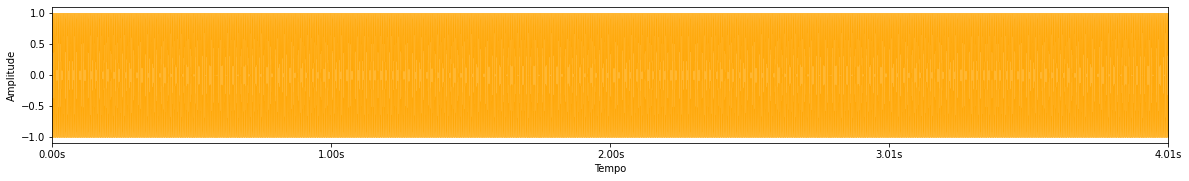

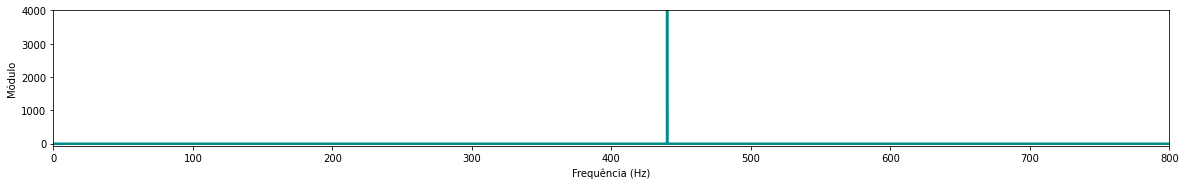

In [2]:
sig = signal().oscilation(440, 4)
sig.plot(size=(20,2.5))
sig.plotfft(size=(20,2.5), xzoom=800, yzoom=4000)

In [3]:
sig.create("sinal seno puro 440Hz")

'sinal seno puro 440Hz.wav'

## Enevelope decaimento exponencial



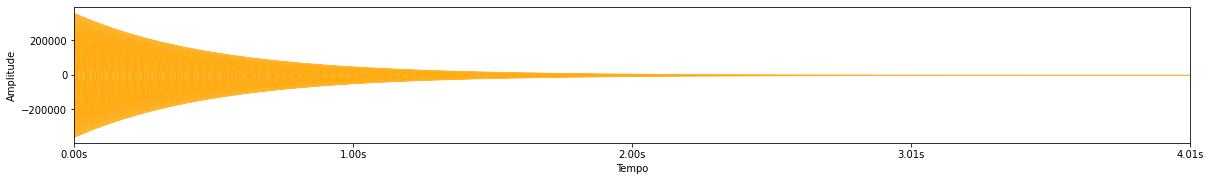

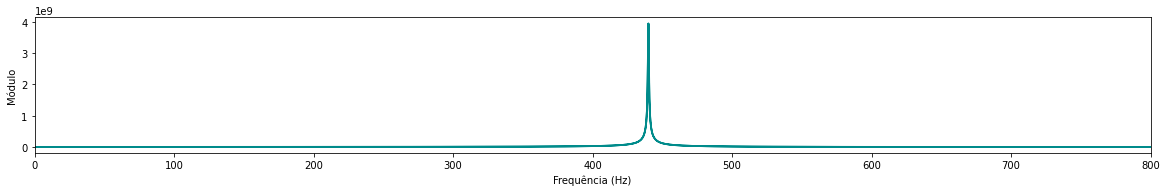

In [4]:
sig.exp_decay(2.0)
sig.plot(size=(20,2.5))
sig.plotfft(size=(20,2.5), xzoom=800)

In [5]:
sig.create("sinal seno puro com decaimento exponencial 440Hz")

'sinal seno puro com decaimento exponencial 440Hz.wav'

## Envelope geométrico imitando o natural

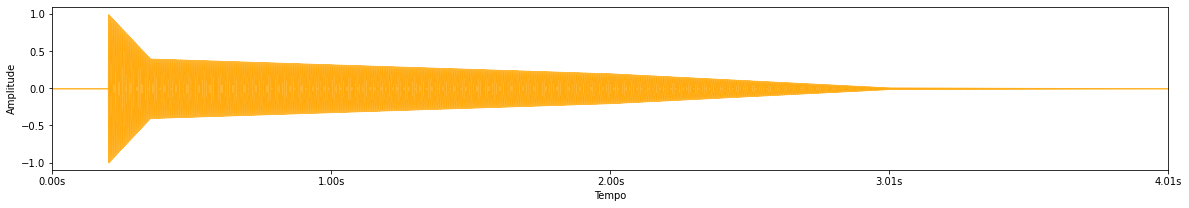

In [6]:
sig = signal().oscilation(440, 4)
env = envelope().geometric([(0,0),(0.2,0),(0.2001, 1),(0.35,0.4),(2,0.2),(3,0.01),(4,0)], 4)
sig.envelopment(env)
sig.plot(size=(20,3))
sig.plotfft(size=(20,4), xzoom=800, yzoom=4000)
sig.play()

In [7]:
sig.create("envelope geometrico ataque 0.0001")

'envelope geometrico ataque 0.0001.wav'

## Diferentes tempos de ataque (0.05s e 0.0001s)

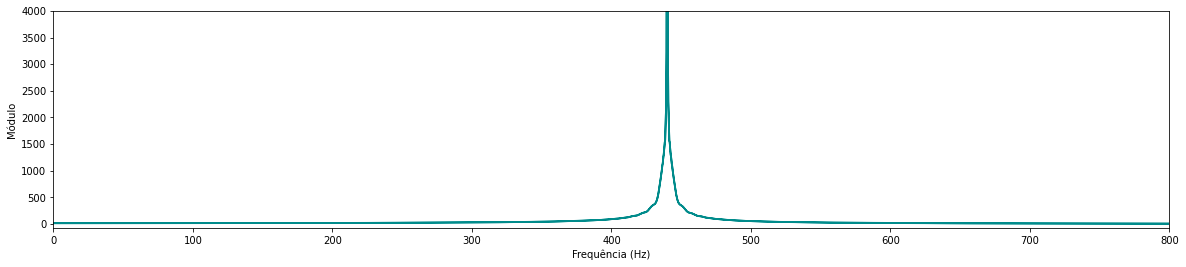

In [8]:
sig = signal().oscilation(440, 4)
env = envelope().geometric([(0,0),(0.2,0),(0.25, 1),(0.35,0.4),(2,0.2),(3,0.01),(4,0)], 4)
sig.envelopment(env)
sig.plotfft(size=(20,4), xzoom=800, yzoom=4000)

sig = signal().oscilation(440, 4)
env = envelope().geometric([(0,0),(0.2,0),(0.2001, 1),(0.35,0.4),(2,0.2),(3,0.01),(4,0)], 4)
sig.envelopment(env)
sig.plotfft(size=(20,4), xzoom=800, yzoom=4000)


## Envelope com duas fases de ataque

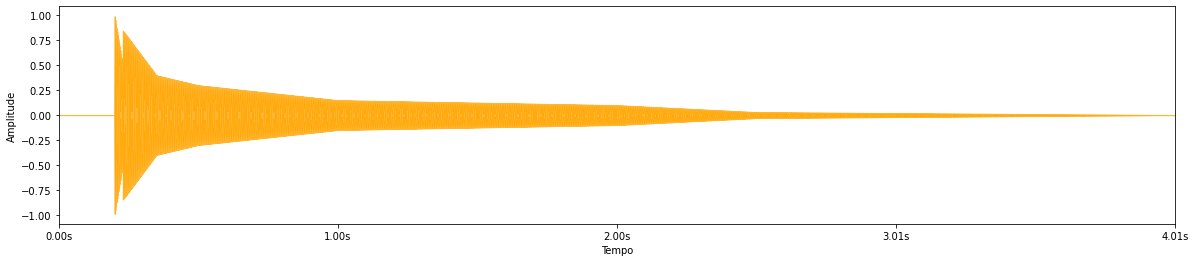

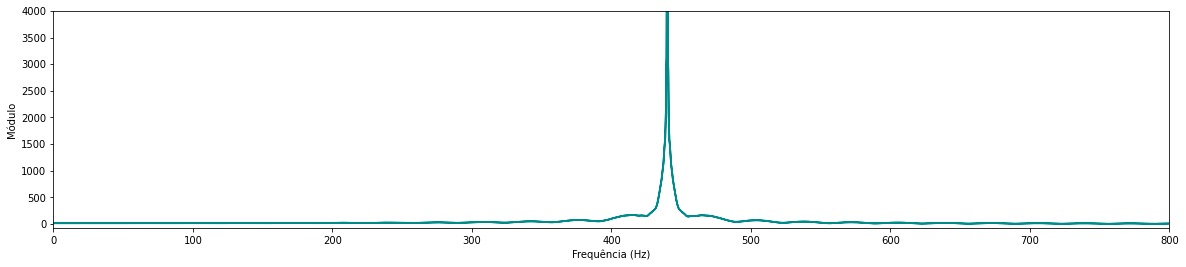

In [9]:
sig = signal().oscilation(440, 4)
env = envelope().geometric([(0,0),(0.2,0),(0.2001, 1),(0.23,0.5),(0.2301,0.85),(0.35,0.4),(0.5,0.3),(1,0.15),(2,0.1),(2.5,0.03),(4,0)], 4)
sig.envelopment(env)
sig.plot(size=(20,4))
sig.plotfft(size=(20,4), xzoom=800, yzoom=4000)
sig.play()

In [10]:
sig.create("ataque duplo")

'ataque duplo.wav'

## Envelope com três fases de ataque

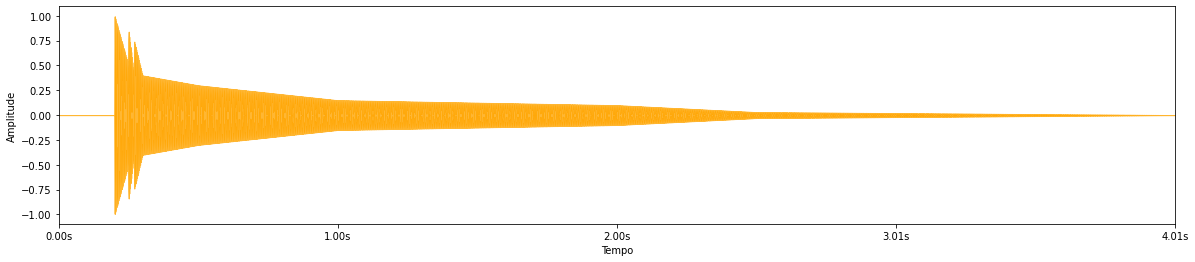

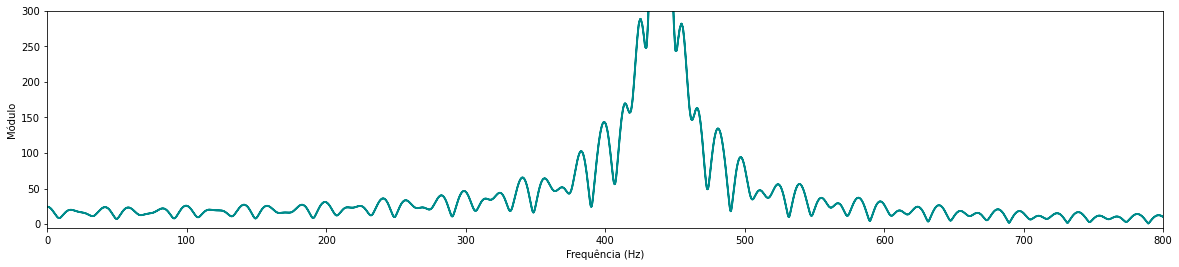

In [26]:
sig = signal().oscilation(440, 4)
env = envelope().geometric([(0,0),(0.2,0),(0.2001, 1),(0.25,0.5),(0.2501,0.85),(0.27,0.4),(0.2701,0.75),(0.3,0.4),(0.5,0.3),(1,0.15),(2,0.1),(2.5,0.03),(4,0)], 4)
sig.envelopment(env)
sig.plot(size=(20,4))
sig.plotfft(size=(20,4), xzoom=800, yzoom=300)
sig.play()

In [12]:
sig.create("ataque triplo")

'ataque triplo.wav'

# Envelopes Naturais

In [13]:
database = pulses_database()
database.show()

Database Available Instruments and Their Respective Keys 

	violin_pulse: ['G3', 'D4', 'E5', 'A4']

	drums: ['snare', 'ground', 'crash16', 'open_hithat', 'crash_bulbe', 'closed_hithat', 'tom']

	steel_guitar: ['B3', 'D3', 'E4', 'A2', 'G3', 'E2']

	eletric_guitar: ['D3', 'B3', 'E2', 'A2', 'E4', 'G3']

	nylon_guitar: ['D3', 'A2', 'E4', 'E2', 'G3', 'B3']

	distortion_guitar: ['G3', 'E2', 'D3', 'B3', 'E4', 'A2']

	harmonica: ['C6', 'E5', 'E4', 'C5', 'C4', 'Cmajor', 'G4']

	viola_caipira: ['A4', 'F#3', 'A2', 'D4', 'D3']

	bass: ['E1', 'G2', 'D2', 'A1']

	violin_pick: ['A4', 'D4', 'G3', 'E5']



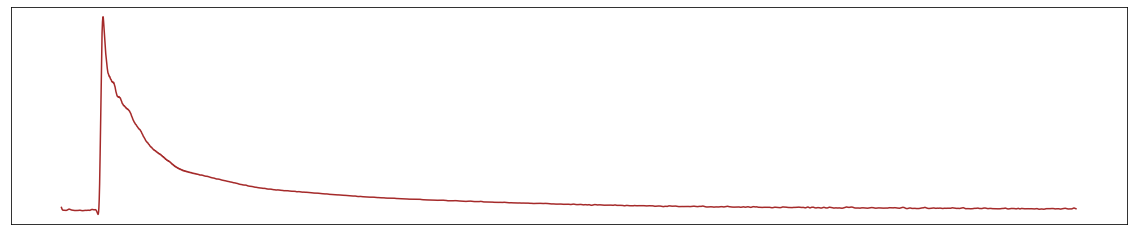

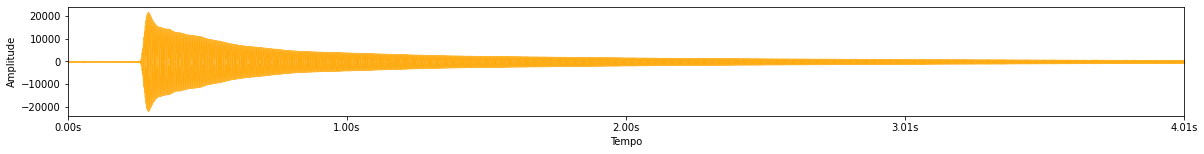

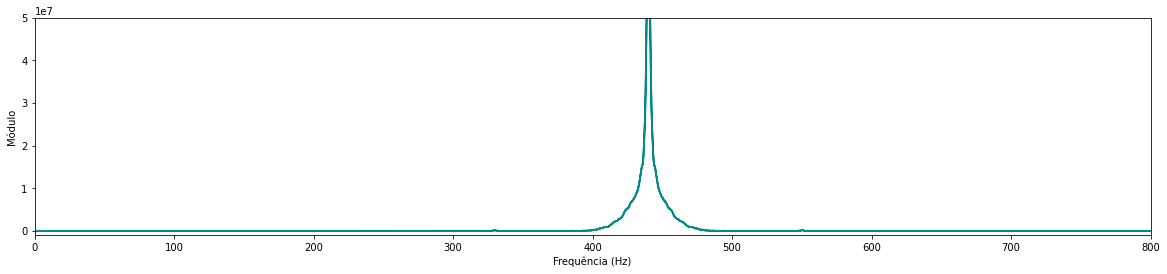

In [14]:
database = pulses_database()
sd = sound(database.dataset('steel_guitar')['A2'])
env = envelope().get_hilbert(sd).lowpass(0.0015)
env.plot(size=(20,4))
sig = signal().oscilation(440, 4)
sig.envelopment(env)
sig.plot(size=(20,2))
sig.plotfft(size=(20,4), xzoom=800, yzoom=0.5e8)

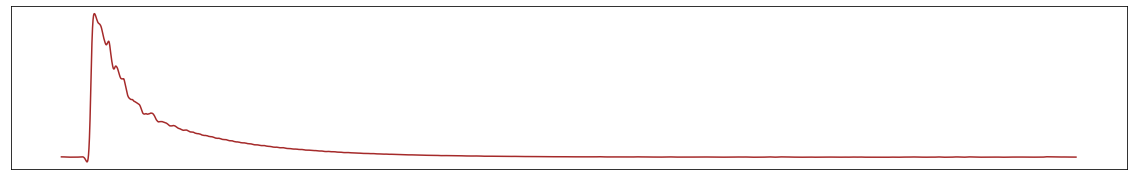

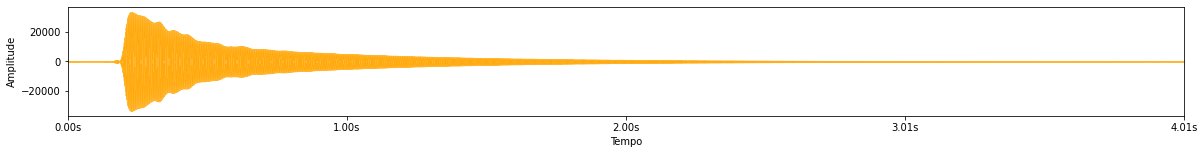

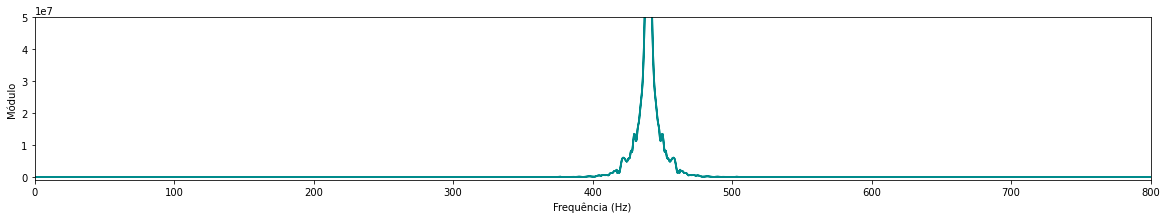

In [15]:
database = pulses_database()
sd = sound(database.dataset('drums')['tom'])
env = envelope().get_hilbert(sd).lowpass(0.0009)
env.plot(size=(20,3))
sig = signal().oscilation(440, 4)
sig.envelopment(env)
sig.plot(size=(20,2))
sig.plotfft(size=(20,3), xzoom=800, yzoom=0.5e8)
sig.play()

In [16]:
sig.create("envelope natural drums_tom")

'envelope natural drums_tom.wav'

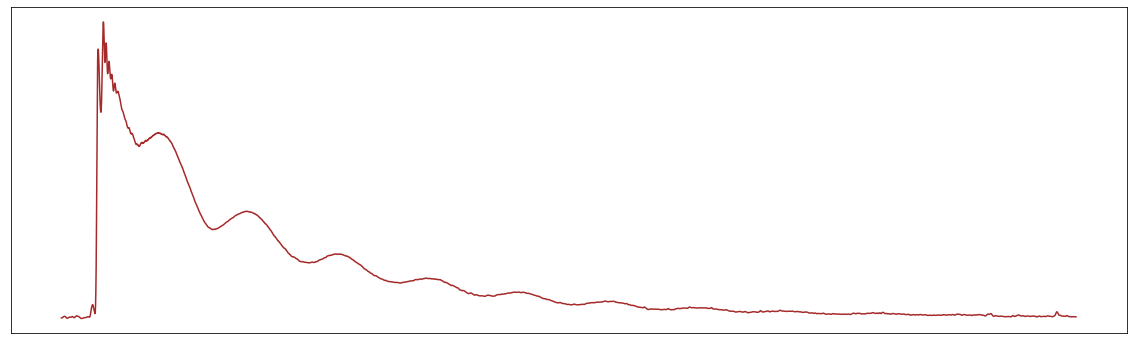

In [17]:
sd = sound(database.dataset('viola_caipira')['F#3'])
env = envelope().get_hilbert(sd).lowpass(0.002)
env.plot(size=(20,6))